In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')
import os
import sys

In [2]:
dataset = pd.read_csv("D:\Learnbay\Stats & ML by Kumar Sundaram Sir\Documents\ML\AirBNB.csv")
dataset.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [3]:
dataset.shape

(74111, 11)

In [4]:
dataset.columns

Index(['id', 'room_type', 'accommodates', 'bathrooms', 'cancellation_policy',
       'cleaning_fee', 'instant_bookable', 'review_scores_rating', 'bedrooms',
       'beds', 'log_price'],
      dtype='object')

In [5]:
dataset.isnull().sum()

id                          0
room_type                   5
accommodates                3
bathrooms                 203
cancellation_policy         8
cleaning_fee                4
instant_bookable            0
review_scores_rating    16722
bedrooms                   92
beds                      131
log_price                   0
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74111 non-null  int64  
 1   room_type             74106 non-null  object 
 2   accommodates          74108 non-null  float64
 3   bathrooms             73908 non-null  float64
 4   cancellation_policy   74103 non-null  object 
 5   cleaning_fee          74107 non-null  object 
 6   instant_bookable      74111 non-null  object 
 7   review_scores_rating  57389 non-null  float64
 8   bedrooms              74019 non-null  float64
 9   beds                  73980 non-null  float64
 10  log_price             74111 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 6.2+ MB


In [7]:
dataset1 =dataset.copy()
dataset1.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


# Data Preprocessing Part

## Part 1-Handling Missing Valiues

In [8]:
dataset.isnull().sum()/len(dataset)

id                      0.000000
room_type               0.000067
accommodates            0.000040
bathrooms               0.002739
cancellation_policy     0.000108
cleaning_fee            0.000054
instant_bookable        0.000000
review_scores_rating    0.225635
bedrooms                0.001241
beds                    0.001768
log_price               0.000000
dtype: float64

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74111 non-null  int64  
 1   room_type             74106 non-null  object 
 2   accommodates          74108 non-null  float64
 3   bathrooms             73908 non-null  float64
 4   cancellation_policy   74103 non-null  object 
 5   cleaning_fee          74107 non-null  object 
 6   instant_bookable      74111 non-null  object 
 7   review_scores_rating  57389 non-null  float64
 8   bedrooms              74019 non-null  float64
 9   beds                  73980 non-null  float64
 10  log_price             74111 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 6.2+ MB


## imputation method

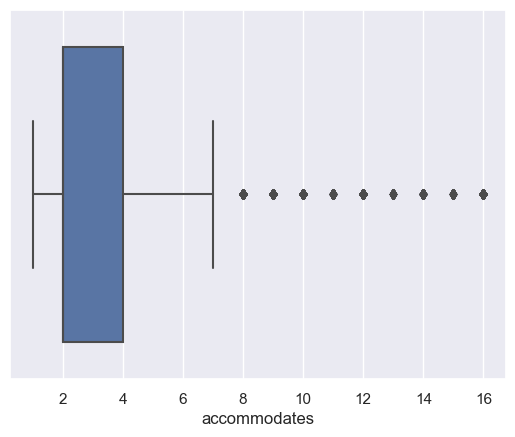

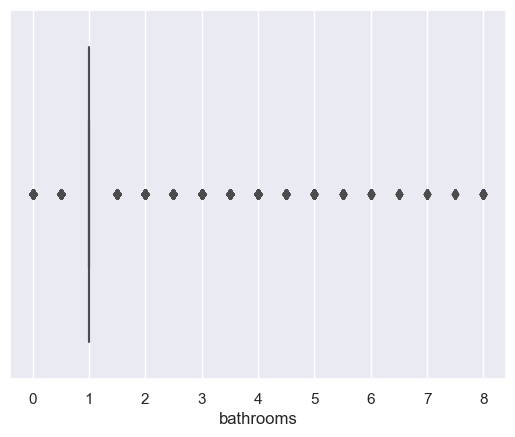

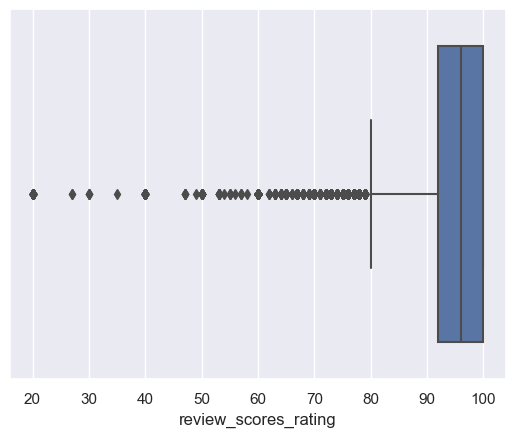

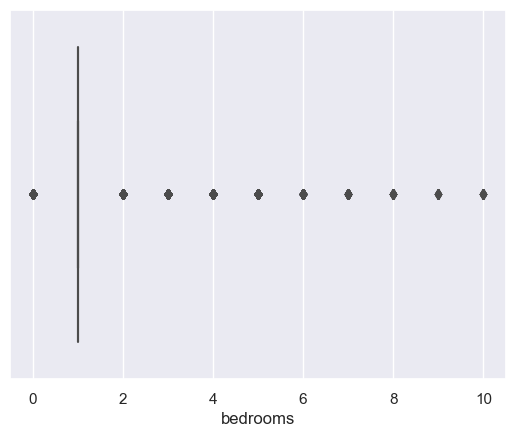

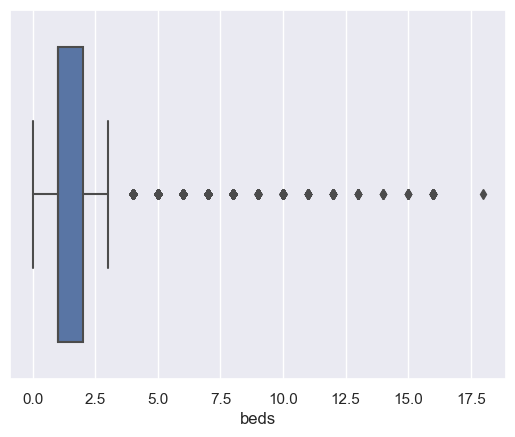

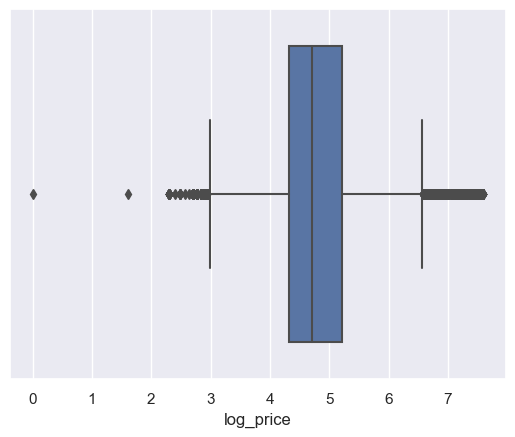

In [10]:
def boxplots(col):
    sns.boxplot(dataset[col])
    plt.show()
    
for i in list(dataset.select_dtypes(exclude = ['object']).columns)[1:]:
    boxplots(i)

In [11]:
dataset.columns

Index(['id', 'room_type', 'accommodates', 'bathrooms', 'cancellation_policy',
       'cleaning_fee', 'instant_bookable', 'review_scores_rating', 'bedrooms',
       'beds', 'log_price'],
      dtype='object')

In [12]:
dataset['room_type'].value_counts()

Entire home/apt    41308
Private room       30635
Shared room         2163
Name: room_type, dtype: int64

In [13]:
dataset['cancellation_policy'].value_counts()

strict      32500
flexible    22543
moderate    19060
Name: cancellation_policy, dtype: int64

In [14]:
dataset['cleaning_fee'].value_counts()

True     54399
False    19708
Name: cleaning_fee, dtype: int64

In [15]:
dataset['room_type'] =dataset['room_type'].fillna('Entire home/apt')

In [16]:
dataset['cancellation_policy'] =dataset['cancellation_policy'].fillna('strict')

In [17]:
dataset['cleaning_fee'] =dataset['cleaning_fee'].fillna('True')

In [18]:
dataset['bathrooms'] =dataset['bathrooms'].fillna(dataset['bathrooms'].median())

In [19]:
dataset['accommodates'] =dataset['accommodates'].fillna(dataset['accommodates'].median())

In [20]:
dataset['review_scores_rating'] =dataset['review_scores_rating'].fillna(dataset['review_scores_rating'].median())

In [21]:
dataset['bedrooms'] =dataset['bedrooms'].fillna(dataset['bedrooms'].median())

In [22]:
dataset['beds'] =dataset['beds'].fillna(dataset['beds'].median())

In [23]:
dataset.isnull().sum()/len(dataset)

id                      0.0
room_type               0.0
accommodates            0.0
bathrooms               0.0
cancellation_policy     0.0
cleaning_fee            0.0
instant_bookable        0.0
review_scores_rating    0.0
bedrooms                0.0
beds                    0.0
log_price               0.0
dtype: float64

## Part 2 -Encoding

In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74111 non-null  int64  
 1   room_type             74111 non-null  object 
 2   accommodates          74111 non-null  float64
 3   bathrooms             74111 non-null  float64
 4   cancellation_policy   74111 non-null  object 
 5   cleaning_fee          74111 non-null  object 
 6   instant_bookable      74111 non-null  object 
 7   review_scores_rating  74111 non-null  float64
 8   bedrooms              74111 non-null  float64
 9   beds                  74111 non-null  float64
 10  log_price             74111 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 6.2+ MB


In [25]:
dataset['room_type'].nunique()

3

In [26]:
dataset['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [27]:
dataset['cancellation_policy'].nunique()

3

In [28]:
dataset['cleaning_fee'].nunique()

3

In [29]:
dataset['instant_bookable'].nunique()

2

In [34]:
# checking whether room_type,cancellation_policy,cleaning_fee,instant_bookable is significant or not
# check 'p' value

import statsmodels.api as sm
from statsmodels.formula.api import ols

model =ols('log_price ~ room_type', data =dataset).fit()
anova_result = sm.stats.anova_lm(model, typ = 2)
print(anova_result)

# room_type is significant variable

                 sum_sq       df             F  PR(>F)
room_type  14283.416104      2.0  22184.047894     0.0
Residual   23857.580133  74108.0           NaN     NaN


In [31]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model =ols('log_price ~ cancellation_policy', data =dataset).fit()
anova_result = sm.stats.anova_lm(model, typ = 2)
print(anova_result)

# Cancellation policy is non significatn 

                           sum_sq       df           F         PR(>F)
cancellation_policy    693.556345      2.0  686.269526  4.823001e-296
Residual             37447.439891  74108.0         NaN            NaN


In [35]:
"""
import statsmodels.api as sm
from statsmodels.formula.api import ols

model =ols('log_price ~cleaning_fee', data =dataset).fit()
anova_result = sm.stats.anova_lm(model, typ = 2)
print(anova_result)
"""
# considering this as non-significant column

"\nimport statsmodels.api as sm\nfrom statsmodels.formula.api import ols\n\nmodel =ols('log_price ~cleaning_fee', data =dataset).fit()\nanova_result = sm.stats.anova_lm(model, typ = 2)\nprint(anova_result)\n"

In [33]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model =ols('log_price ~ instant_bookable', data =dataset).fit()
anova_result = sm.stats.anova_lm(model, typ = 2)
print(anova_result)

# instant_bookable is non significant

                        sum_sq       df           F        PR(>F)
instant_bookable     74.754303      1.0  145.534899  1.763741e-33
Residual          38066.241933  74109.0         NaN           NaN


In [36]:
dataset['room_type'] = dataset['room_type'].astype('category')
dataset['room_type'] = dataset['room_type'].cat.codes

In [37]:
dataset.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,0,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,0,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,0,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,0,4.0,1.0,flexible,True,f,96.0,2.0,2.0,6.620073
4,3808709,0,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [40]:
dataset = dataset.drop(['id','cancellation_policy','cleaning_fee','instant_bookable'],axis = 1)
dataset.head()

,room_type,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price
0,0,3.0,1.0,100.0,1.0,1.0,5.010635
1,0,7.0,1.0,93.0,3.0,3.0,5.129899
2,0,5.0,1.0,92.0,1.0,3.0,4.976734
3,0,4.0,1.0,96.0,2.0,2.0,6.620073
4,0,2.0,1.0,40.0,0.0,1.0,4.744932


In [42]:
dataset = pd.get_dummies(dataset, columns=['room_type'])
dataset.head()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price,room_type_0,room_type_1,room_type_2
0,3.0,1.0,100.0,1.0,1.0,5.010635,1,0,0
1,7.0,1.0,93.0,3.0,3.0,5.129899,1,0,0
2,5.0,1.0,92.0,1.0,3.0,4.976734,1,0,0
3,4.0,1.0,96.0,2.0,2.0,6.620073,1,0,0
4,2.0,1.0,40.0,0.0,1.0,4.744932,1,0,0


## Part 3 -Outliers

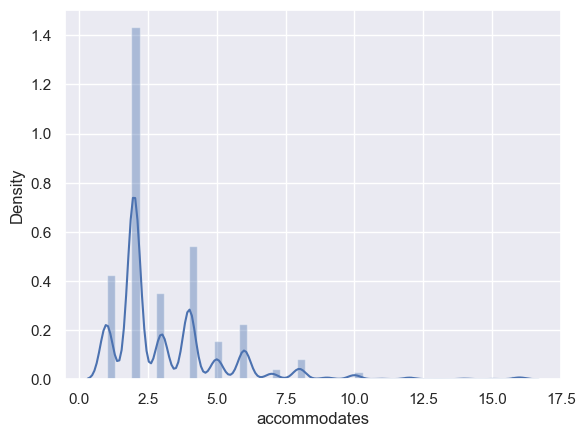

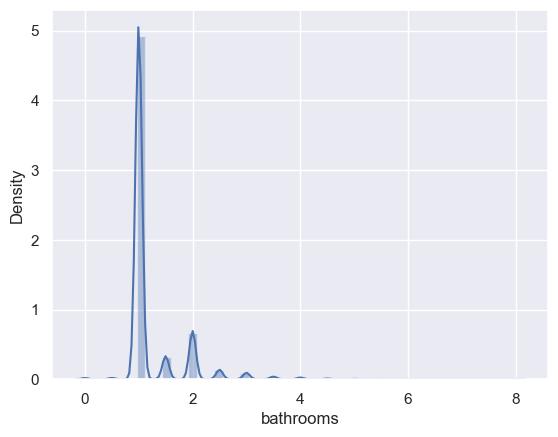

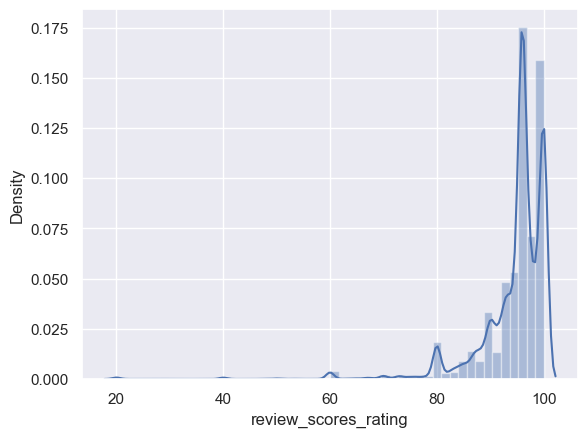

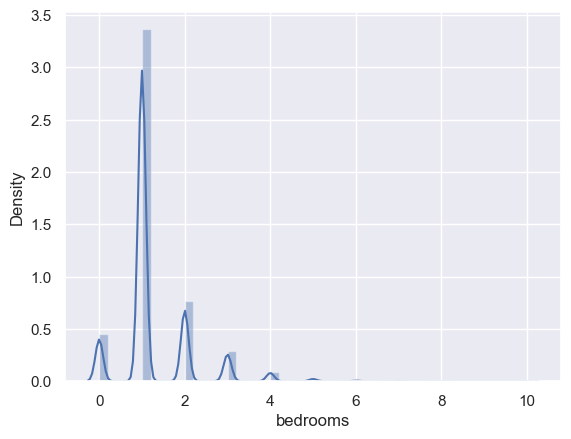

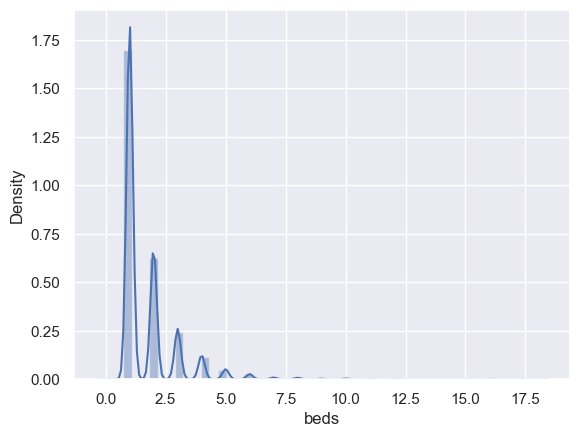

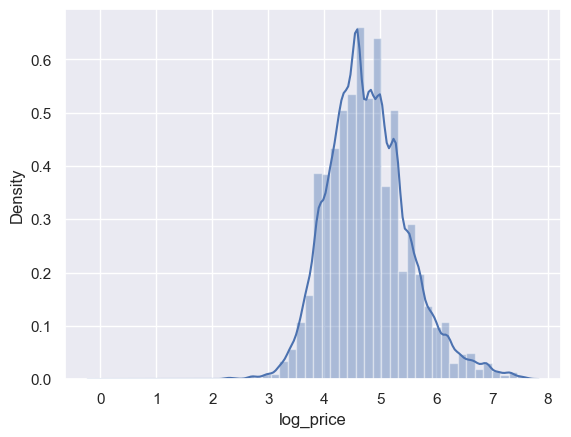

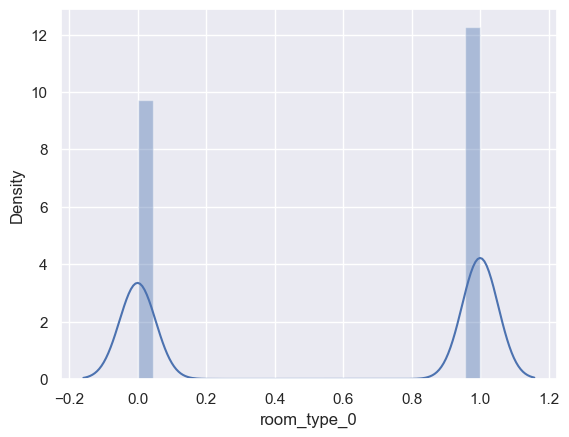

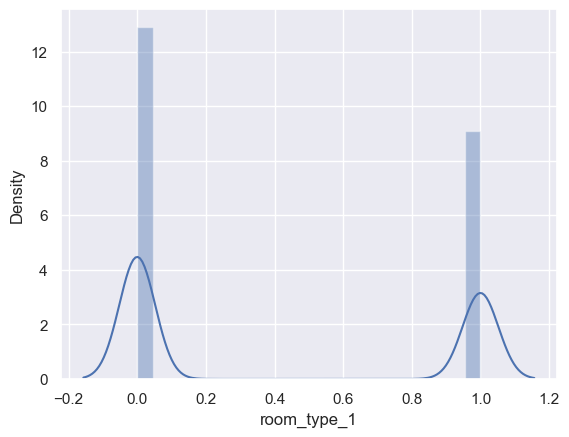

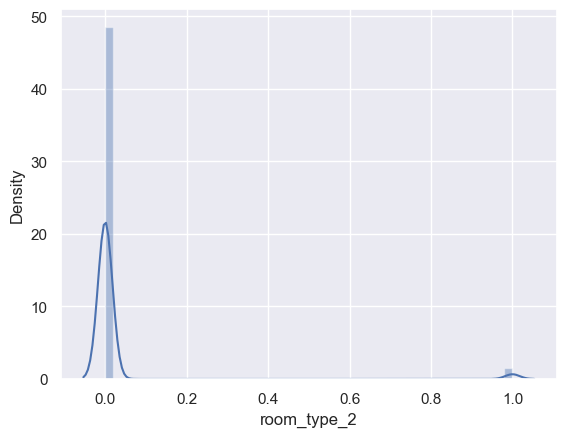

In [44]:
def distplot(col):
    sns.distplot(dataset[col])
    plt.show()
    
for i in list(dataset.columns)[0:]:
    distplot(i)

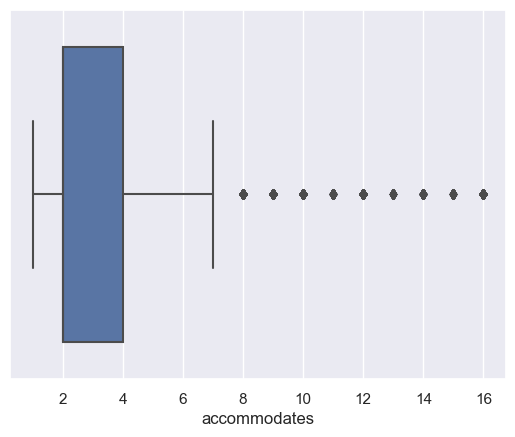

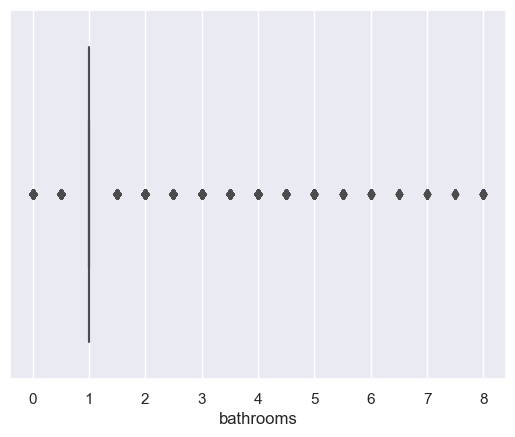

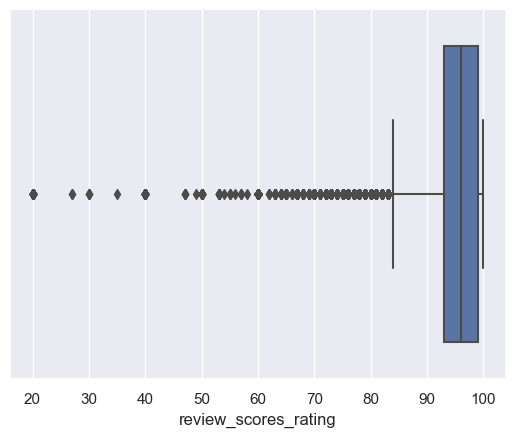

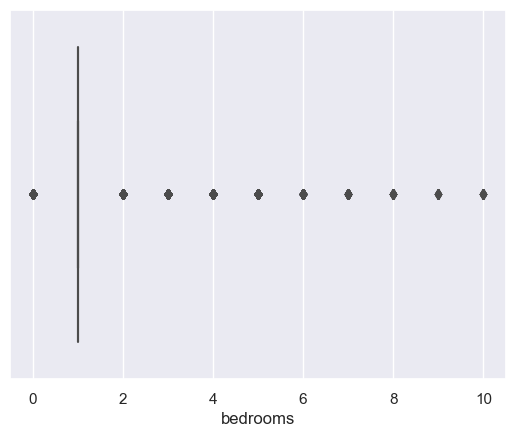

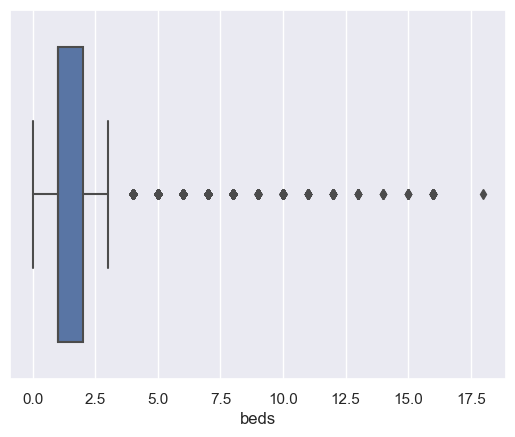

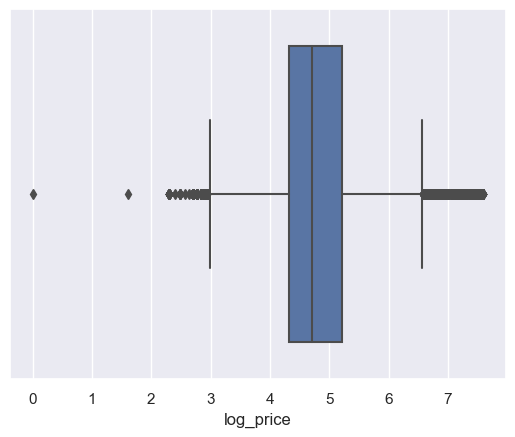

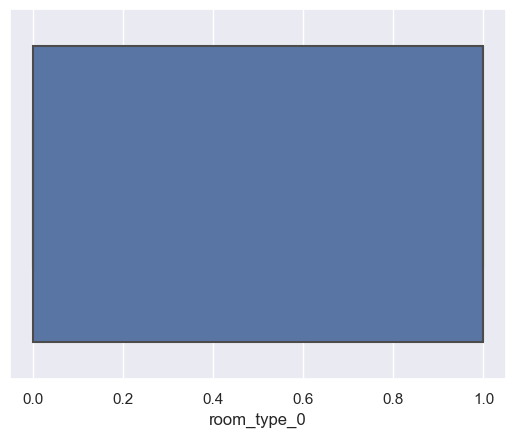

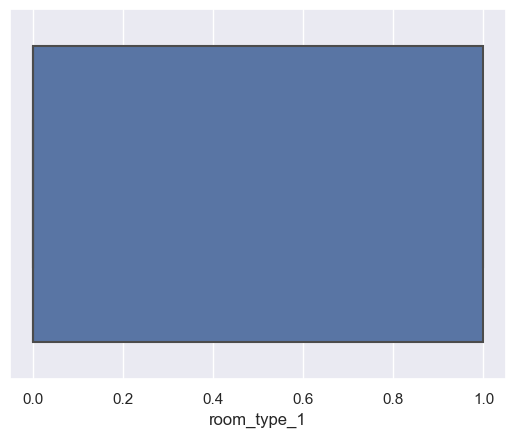

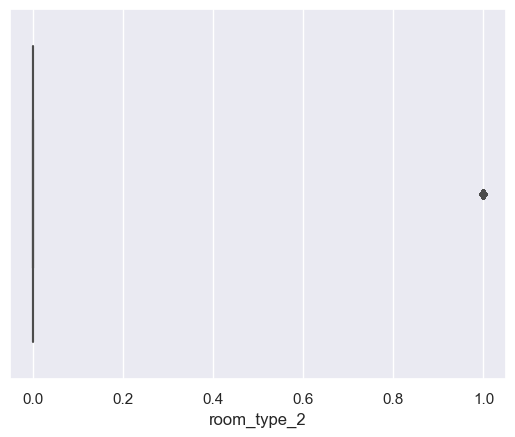

In [46]:
def boxplot(col):
    sns.boxplot(dataset[col])
    plt.show()
    
for i in list(dataset.columns)[0:]:
    boxplot(i)

In [47]:
dataset.columns

Index(['accommodates', 'bathrooms', 'review_scores_rating', 'bedrooms', 'beds',
       'log_price', 'room_type_0', 'room_type_1', 'room_type_2'],
      dtype='object')

In [56]:

accommodates_q1 = dataset['accommodates'].quantile(0.25)
accommodates_q3 = dataset['accommodates'].quantile(0.75)
acc_iqr = accommodates_q3 - accommodates_q1

In [57]:
upper_accommodate = accommodates_q3 + 1.5 * (acc_iqr)
lower_accommodate = accommodates_q3 - 1.5 * (acc_iqr)
print(upper_accommodate)
print(lower_accommodate)

7.0
1.0


In [58]:
dataset['accommodates'] = np.where(dataset['accommodates'] > upper_accommodate,upper_accommodate,
                                  np.where(dataset['accommodates'] < lower_accommodate,lower_accommodate, dataset['accommodates']))

In [61]:
bathrooms_q1 = dataset['bathrooms'].quantile(0.25)
bathrooms_q3 = dataset['bathrooms'].quantile(0.75)
bath_iqr = bathrooms_q3 - bathrooms_q1

upper_bathrooms = bathrooms_q3 + 1.5 * (bath_iqr)
lower_bathrooms = bathrooms_q3 - 1.5 * (bath_iqr)

In [60]:
dataset['bathrooms'] = np.where(dataset['bathrooms'] > upper_bathrooms,upper_bathrooms,
                                  np.where(dataset['bathrooms'] < lower_bathrooms,lower_bathrooms, dataset['bathrooms']))

In [63]:
review_scores_rating_q1 = dataset['review_scores_rating'].quantile(0.25)
review_scores_rating_q3 = dataset['review_scores_rating'].quantile(0.75)
rev_iqr = review_scores_rating_q3 - review_scores_rating_q1

upper_review_scores_rating = review_scores_rating_q3 + 1.5 * (rev_iqr)
lower_review_scores_rating = review_scores_rating_q3 - 1.5 * (rev_iqr)

In [64]:
dataset['review_scores_rating'] = np.where(dataset['review_scores_rating'] > upper_review_scores_rating,upper_review_scores_rating,
                                  np.where(dataset['review_scores_rating'] < lower_review_scores_rating,lower_review_scores_rating, dataset['review_scores_rating']))

In [67]:
bedrooms_q1 = dataset['bedrooms'].quantile(0.25)
bedrooms_q3 = dataset['bedrooms'].quantile(0.75)
bedrooms_iqr = bedrooms_q3 - bedrooms_q1

upper_bedrooms = bedrooms_q3 + 1.5 * (bath_iqr)
lower_bedrooms = bedrooms_q3 - 1.5 * (bedrooms_iqr)

In [68]:
dataset['bedrooms'] = np.where(dataset['bedrooms'] > upper_bedrooms,upper_bedrooms,
                                  np.where(dataset['bedrooms'] < lower_bedrooms,lower_bedrooms, dataset['bedrooms']))

In [69]:
beds_q1 = dataset['beds'].quantile(0.25)
beds_q3 = dataset['beds'].quantile(0.75)
beds_iqr = beds_q3 - beds_q1

upper_beds = beds_q3 + 1.5 * (beds_iqr)
lower_beds = beds_q3 - 1.5 * (beds_iqr)

In [70]:
dataset['beds'] = np.where(dataset['beds'] > upper_beds,upper_beds,
                                  np.where(dataset['beds'] < lower_beds,lower_beds, dataset['beds']))

In [71]:
room_type_0_q1 = dataset['room_type_0'].quantile(0.25)
room_type_0_q3 = dataset['room_type_0'].quantile(0.75)
room_type_0_iqr = room_type_0_q3 - room_type_0_q1

upper_room_type_0 = room_type_0_q3 + 1.5 * (room_type_0_iqr)
lower_room_type_0 = room_type_0_q3 - 1.5 * (room_type_0_iqr)

In [72]:
dataset['room_type_0'] = np.where(dataset['room_type_0'] > upper_room_type_0,upper_room_type_0,
                                  np.where(dataset['room_type_0'] < lower_room_type_0,lower_room_type_0, dataset['room_type_0']))

In [73]:
room_type_1_q1 = dataset['room_type_1'].quantile(0.25)
room_type_1_q3 = dataset['room_type_1'].quantile(0.75)
room_type_1_iqr = room_type_1_q3 - room_type_1_q1

upper_room_type_1 = room_type_1_q3 + 1.5 * (room_type_1_iqr)
lower_room_type_1 = room_type_1_q3 - 1.5 * (room_type_1_iqr)

In [74]:
dataset['room_type_1'] = np.where(dataset['room_type_1'] > upper_room_type_1,upper_room_type_1,
                                  np.where(dataset['room_type_1'] < lower_room_type_1,lower_room_type_1, dataset['room_type_1']))

In [75]:
room_type_2_q1 = dataset['room_type_2'].quantile(0.25)
room_type_2_q3 = dataset['room_type_2'].quantile(0.75)
room_type_2_iqr = room_type_2_q3 - room_type_2_q1

upper_room_type_2 = room_type_2_q3 + 1.5 * (room_type_2_iqr)
lower_room_type_2 = room_type_2_q3 - 1.5 * (room_type_2_iqr)

In [76]:
dataset['room_type_2'] = np.where(dataset['room_type_2'] > upper_room_type_2,upper_room_type_2,
                                  np.where(dataset['room_type_2'] < lower_room_type_2,lower_room_type_2, dataset['room_type_2']))

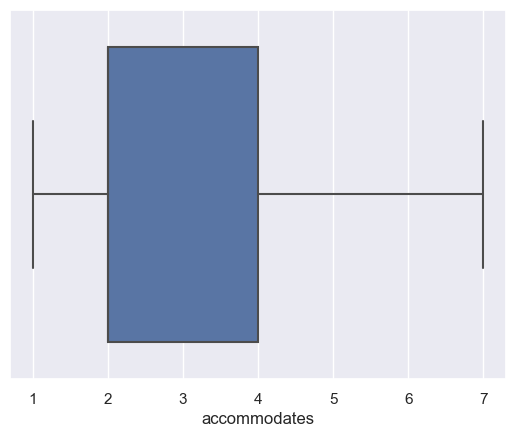

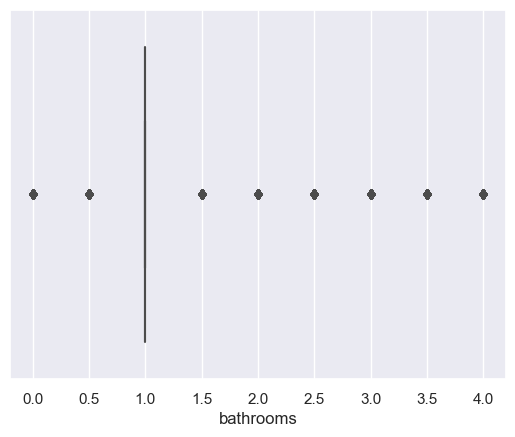

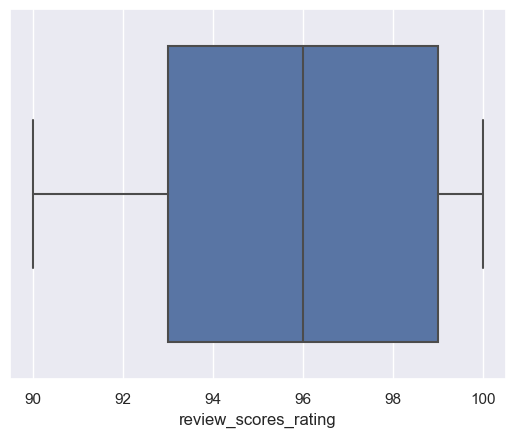

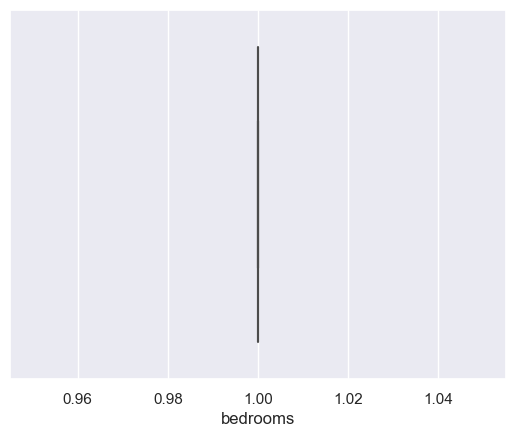

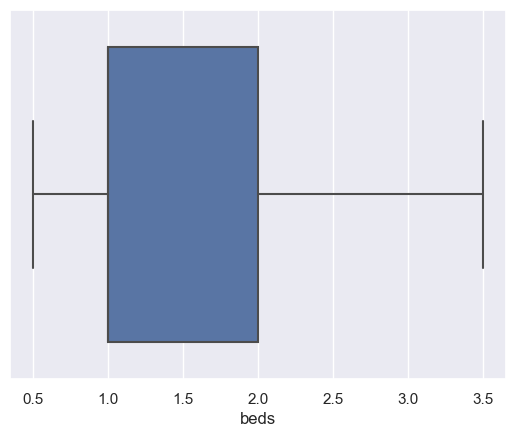

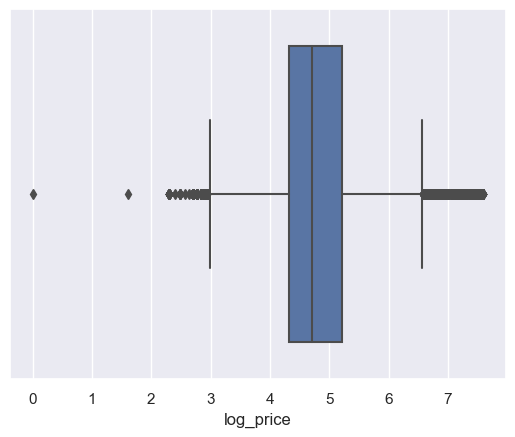

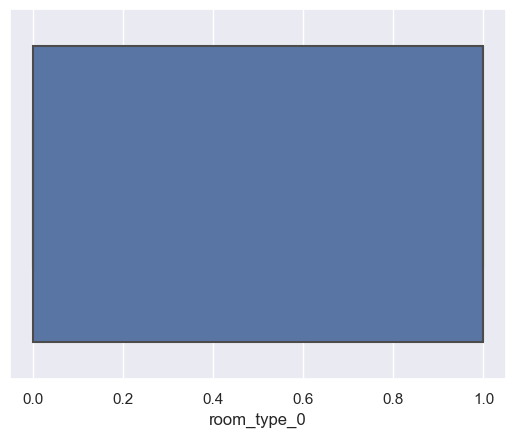

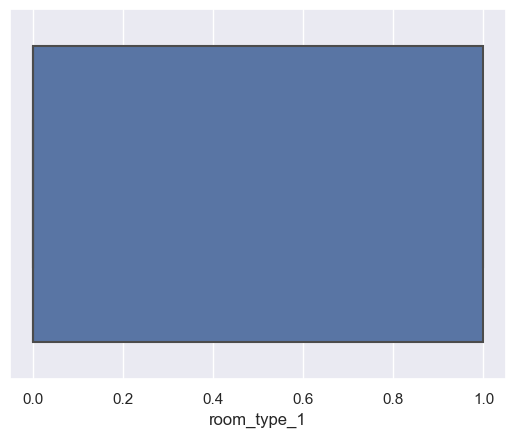

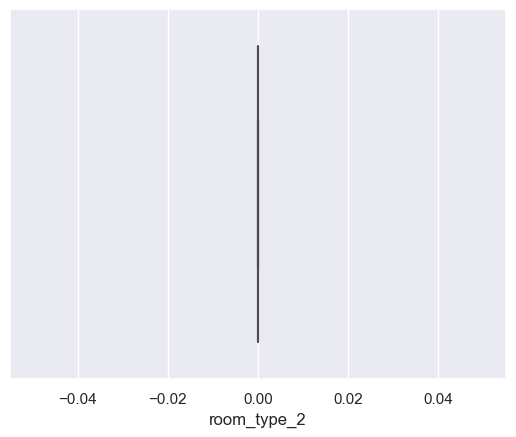

In [77]:
def boxplot(col):
    sns.boxplot(dataset[col])
    plt.show()
    
for i in list(dataset.columns)[0:]:
    boxplot(i)

## Part 4 - Feature Scaling

In [78]:
dataset.head()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price,room_type_0,room_type_1,room_type_2
0,3.0,1.0,100.0,1.0,1.0,5.010635,1.0,0.0,0.0
1,7.0,1.0,93.0,1.0,3.0,5.129899,1.0,0.0,0.0
2,5.0,1.0,92.0,1.0,3.0,4.976734,1.0,0.0,0.0
3,4.0,1.0,96.0,1.0,2.0,6.620073,1.0,0.0,0.0
4,2.0,1.0,90.0,1.0,1.0,4.744932,1.0,0.0,0.0


In [83]:
x = dataset.drop(['log_price'],axis = 1)
y = dataset[['log_price']]

In [85]:
x.head()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,room_type_0,room_type_1,room_type_2
0,3.0,1.0,100.0,1.0,1.0,1.0,0.0,0.0
1,7.0,1.0,93.0,1.0,3.0,1.0,0.0,0.0
2,5.0,1.0,92.0,1.0,3.0,1.0,0.0,0.0
3,4.0,1.0,96.0,1.0,2.0,1.0,0.0,0.0
4,2.0,1.0,90.0,1.0,1.0,1.0,0.0,0.0


In [84]:
y.head()

,log_price
0,5.010635
1,5.129899
2,4.976734
3,6.620073
4,4.744932


In [86]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_fs_sc = sc.fit_transform(x)

In [87]:
pd.DataFrame(x_fs_sc).head()

,0,1,2,3,4,5,6,7
0,-0.010620,-0.426492,1.271120,0.0,-0.704737,0.891005,-0.839429,0.0
1,2.349267,-0.426492,-0.782270,0.0,1.680083,0.891005,-0.839429,0.0
2,1.169324,-0.426492,-1.075612,0.0,1.680083,0.891005,-0.839429,0.0
3,0.579352,-0.426492,0.097754,0.0,0.487673,0.891005,-0.839429,0.0
4,-0.600591,-0.426492,-1.662295,0.0,-0.704737,0.891005,-0.839429,0.0


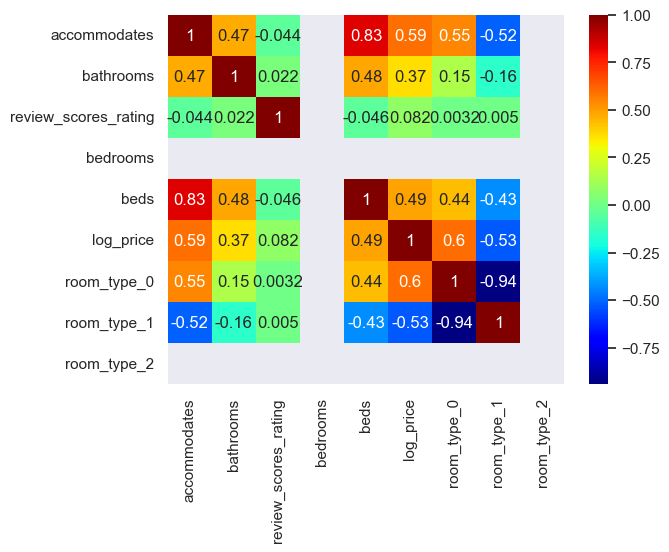

In [99]:
# Heatmap

sns.heatmap(dataset.corr(), annot = True, cmap = 'jet')
plt.show()

## Variance Inflation Factor(VIF) 

In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variable = x_fs_sc

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i) 
                                    for i in range(variable.shape[1])]

vif['Features'] = x.columns

In [102]:
vif

,Variance Inflation Factor,Features
0,3.981650,accommodates
1,1.358214,bathrooms
2,1.007263,review_scores_rating
3,NaN,bedrooms
4,3.412068,beds
5,9.558329,room_type_0
6,9.006025,room_type_1
7,NaN,room_type_2


In [ ]:
# No vaiable has more than 5vif(except dummy variable), so there is no multicollinearity

## Advance EDA pandas profiling

In [104]:
from pandas_profiling import ProfileReport
prof = ProfileReport(dataset)
prof.to_file(output_file = "EDA_for_AirBNB _dataset.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

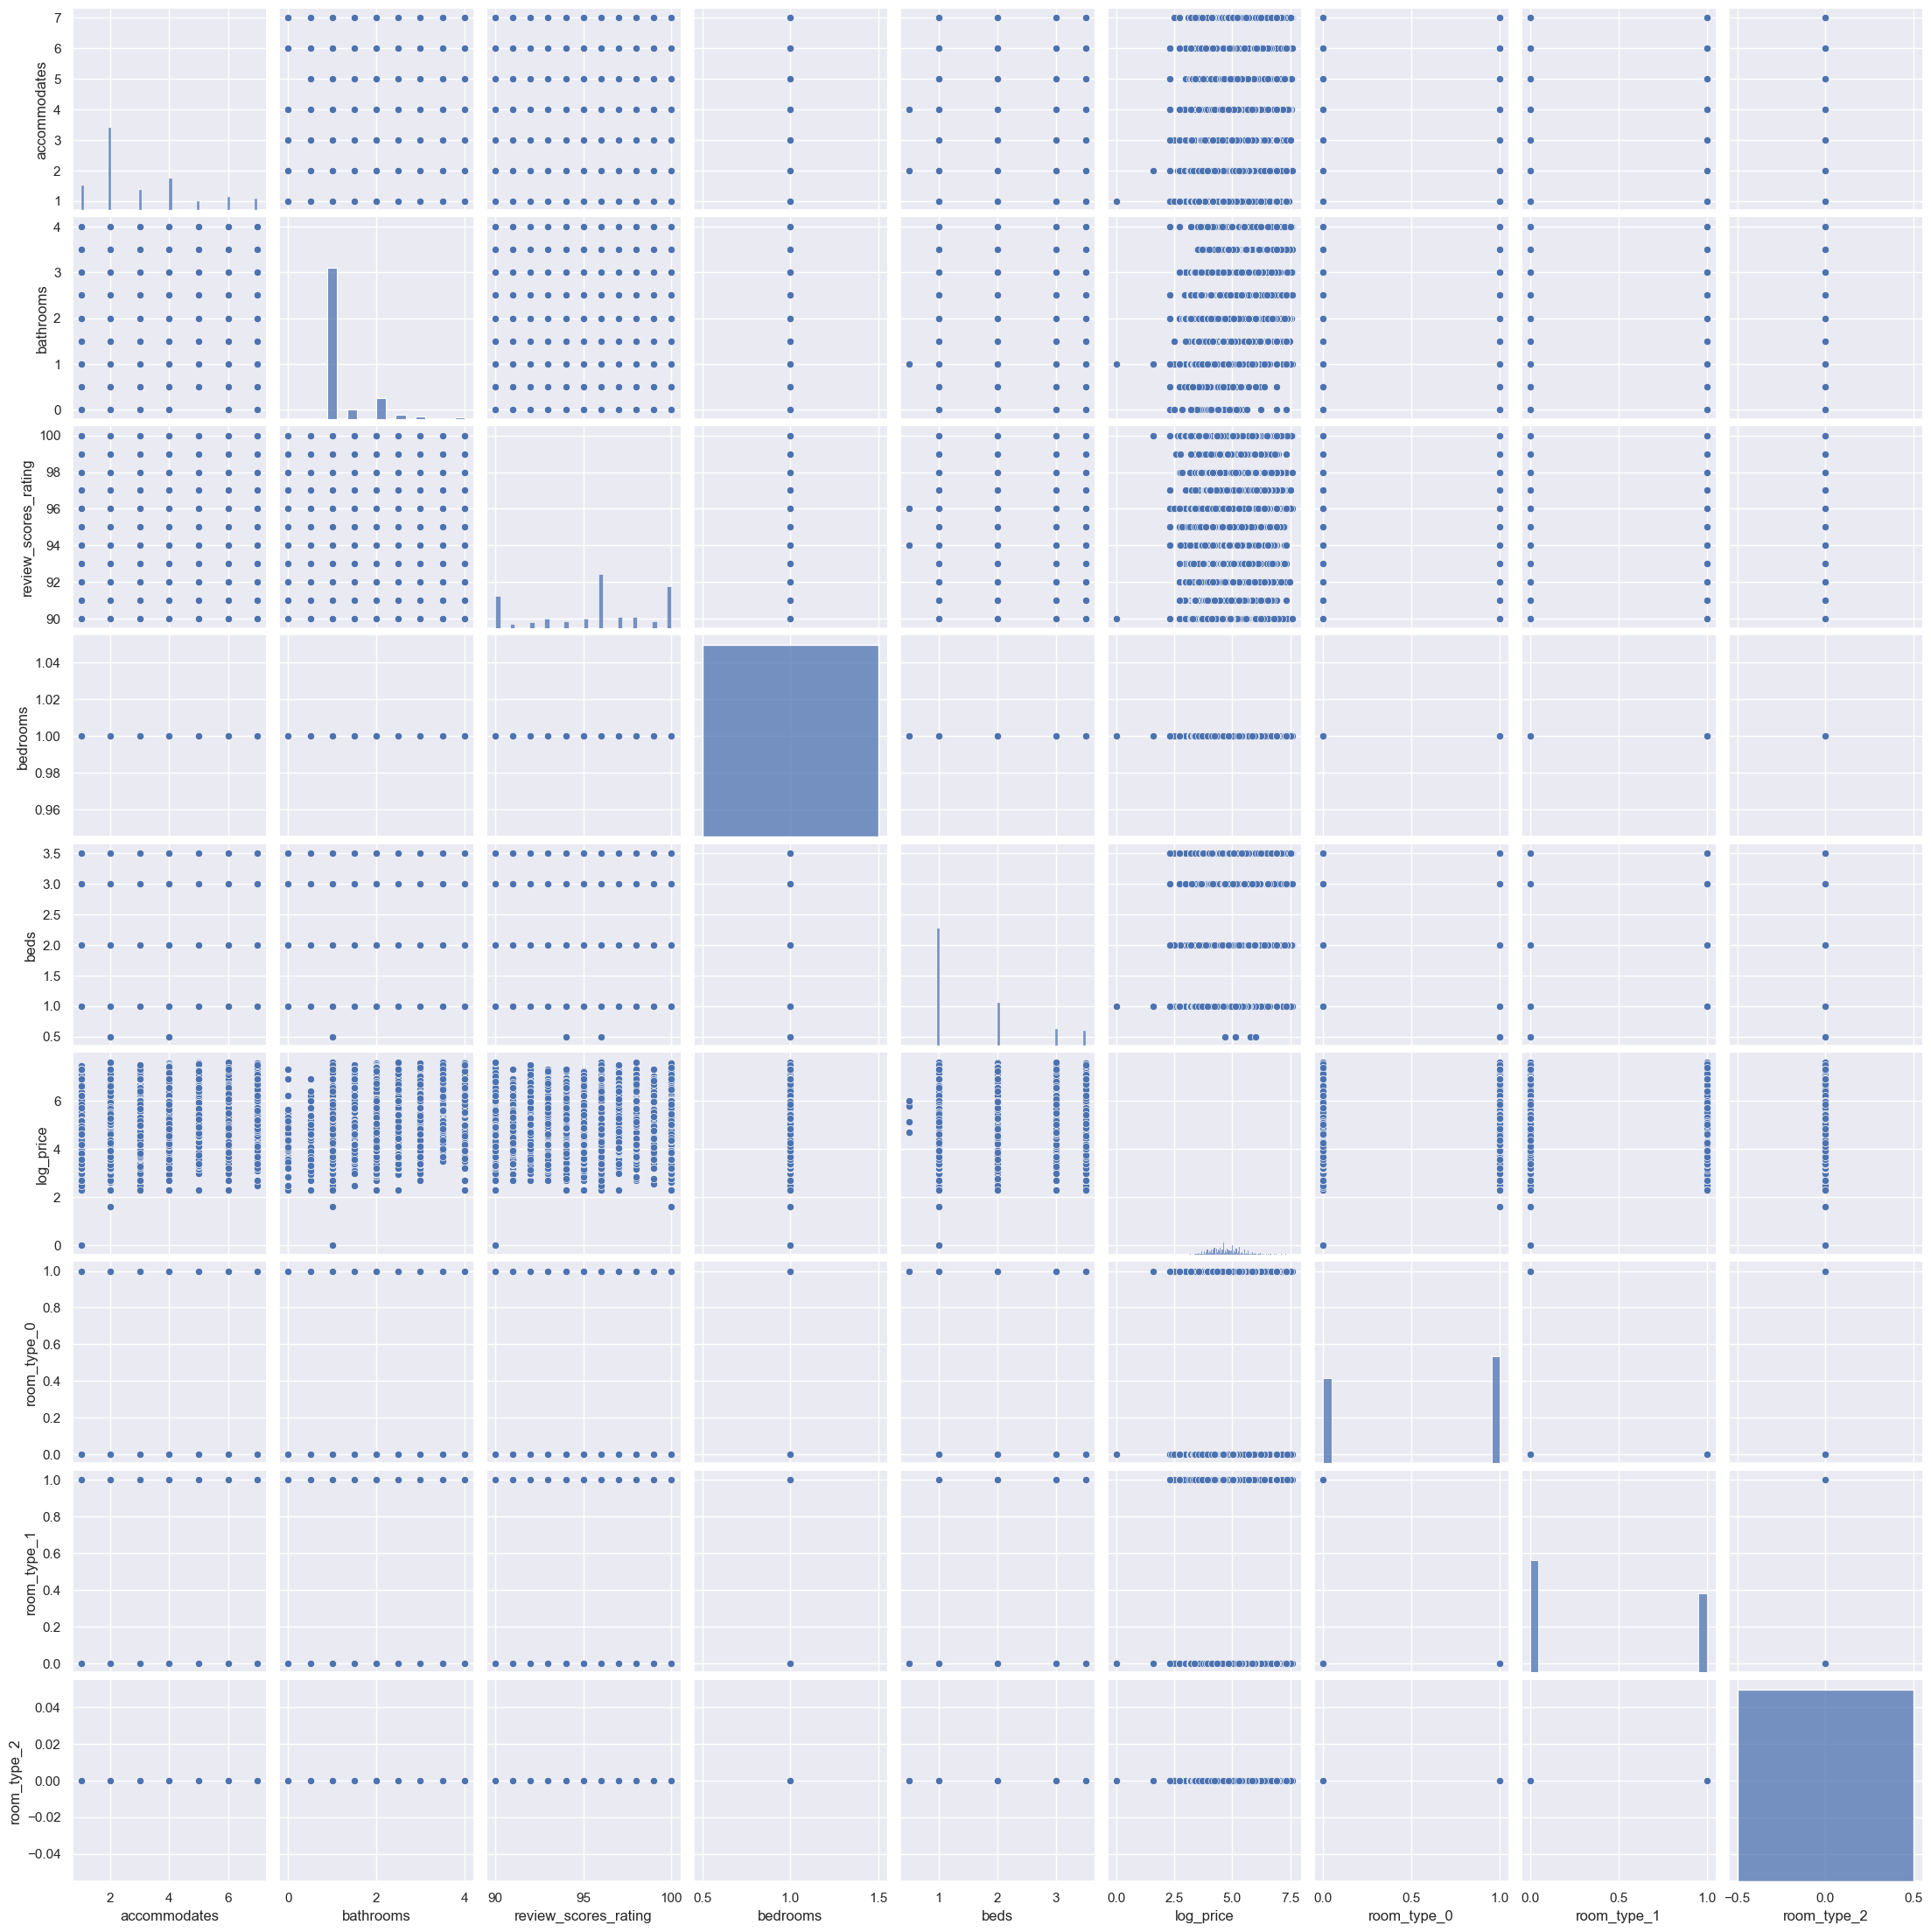

In [106]:
sns.pairplot(dataset)

## Split the data into train and test

In [108]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=1)

## Build OLS Model

In [109]:
from statsmodels.regression.linear_model import OLS

import statsmodels.regression.linear_model as smf

In [110]:
regression_model = smf.OLS(endog = y_train,exog = x_train).fit()

In [111]:
regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     9451.
Date:                Wed, 02 Aug 2023   Prob (F-statistic):               0.00
Time:                        22:35:23   Log-Likelihood:                -40808.
No. Observations:               55583   AIC:                         8.163e+04
Df Residuals:                   55576   BIC:                         8.169e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
accommodates             0.1193      0.003     47.546      0.000       0.114       0.124
bathrooms                0.2372      0.005     50.812      0.000       0.228       0.246
review_scores_rating     0.0181      0.001     28.735      0.000       0.017       0.019
bedrooms                 1.6081      0.061     26.183      0.000       1.488       1.728
beds                    -0.0049      0.005     -1.039      0.299      -0.014       0.004
room_type_0              1.0697      0.013     80.005      0.000       1.044       1.096
room_type_1              0.4891      0.013     37.344      0.000       0.463       0.515
room_type_2                   0          0        nan        nan           0           0
==============================================================================
Omnibus:                     6366.382   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16786.611
Skew:                           0.651   Prob(JB):                         0.00
Kurtosis:                       5.357   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [112]:
regression_model1 = smf.OLS(endog=y_test, exog=x_test).fit()

In [113]:
regression_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     3048.
Date:                Wed, 02 Aug 2023   Prob (F-statistic):               0.00
Time:                        22:38:15   Log-Likelihood:                -13829.
No. Observations:               18528   AIC:                         2.767e+04
Df Residuals:                   18521   BIC:                         2.773e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
accommodates             0.1299      0.004     29.125      0.000       0.121       0.139
bathrooms                0.2318      0.008     28.524      0.000       0.216       0.248
review_scores_rating     0.0181      0.001     16.337      0.000       0.016       0.020
bedrooms                 1.6348      0.108     15.131      0.000       1.423       1.847
beds                    -0.0213      0.008     -2.548      0.011      -0.038      -0.005
room_type_0              1.0472      0.023     45.433      0.000       1.002       1.092
room_type_1              0.4769      0.023     21.158      0.000       0.433       0.521
room_type_2                   0          0        nan        nan           0           0
==============================================================================
Omnibus:                     1987.734   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5281.501
Skew:                           0.609   Prob(JB):                         0.00
Kurtosis:                       5.315   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [114]:
from sklearn.linear_model import LinearRegression
lr =LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [115]:
y_pred_train = lr.predict(x_train)
y_pred_test  = lr.predict(x_test)

In [116]:
from sklearn.metrics import r2_score

In [117]:
print("Training Accuracy ", r2_score(y_train, y_pred_train))
print("****************"*10)
print("Test Accuracy ", r2_score(y_test, y_pred_test))

Training Accuracy  0.5050188884330291
****************************************************************************************************************************************************************
Test Accuracy  0.4965998484698714


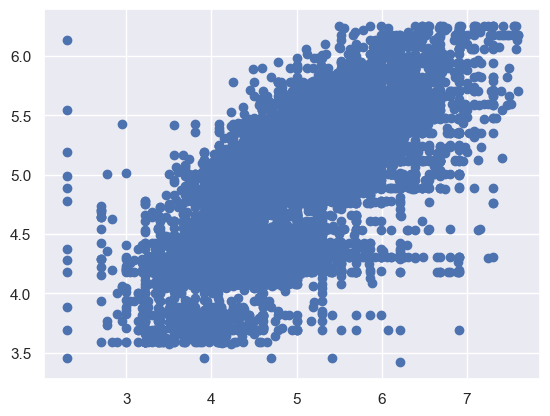

In [118]:
# Linearity

plt.scatter(y_test,y_pred_test)

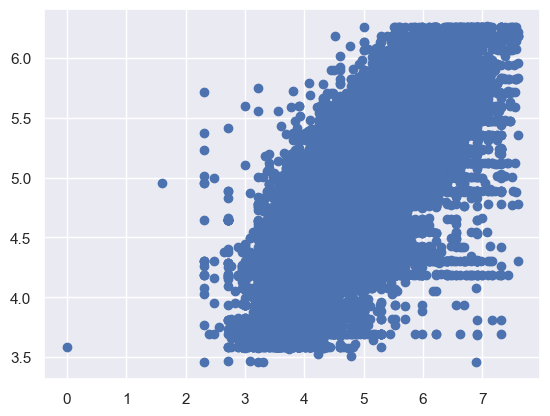

In [119]:
plt.scatter(y_train,y_pred_train)

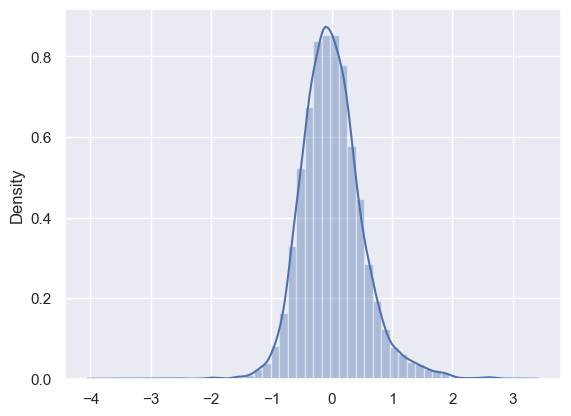

In [121]:
# Residual -Normality

sns.distplot((y_test - y_pred_test),bins = 50)

plt.show()

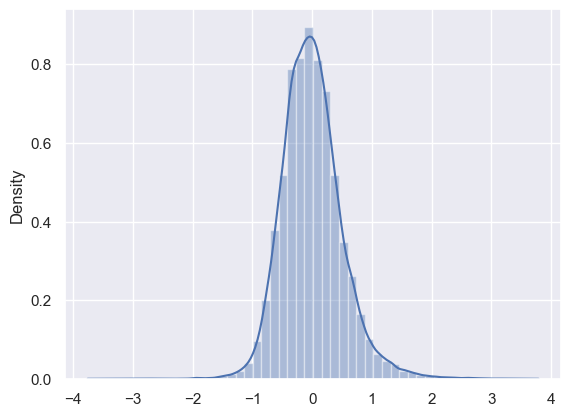

In [122]:
sns.distplot((y_train - y_pred_train),bins=50)
plt.show()

## Gradient Descent(optmization method)

### Without Feature scaling we should not use Gradient Descent,because it give very pathetic results

In [126]:
from sklearn.linear_model import SGDRegressor

In [127]:
sgd = SGDRegressor()
sgd.fit(x_train, y_train)

SGDRegressor()

In [128]:
y_pred_train_sgd = sgd.predict(x_train)
y_pred_test_sgd = sgd.predict(x_test)

In [129]:
print(r2_score(y_train, y_pred_train_sgd))
print()
print(r2_score(y_test, y_pred_test_sgd))

-24964676760077.086

-24567614697782.598


### With Feature scaling Gradient Descent

In [130]:
pd.DataFrame(x_fs_sc).head()

,0,1,2,3,4,5,6,7
0,-0.010620,-0.426492,1.271120,0.0,-0.704737,0.891005,-0.839429,0.0
1,2.349267,-0.426492,-0.782270,0.0,1.680083,0.891005,-0.839429,0.0
2,1.169324,-0.426492,-1.075612,0.0,1.680083,0.891005,-0.839429,0.0
3,0.579352,-0.426492,0.097754,0.0,0.487673,0.891005,-0.839429,0.0
4,-0.600591,-0.426492,-1.662295,0.0,-0.704737,0.891005,-0.839429,0.0


In [131]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_fs_sc,y,test_size = 0.25,random_state=1)

In [132]:
sgd = SGDRegressor()
sgd.fit(x_train, y_train)

SGDRegressor()

In [133]:
y_pred_train_sgd = sgd.predict(x_train)
y_pred_test_sgd = sgd.predict(x_test)

In [134]:
print(r2_score(y_train, y_pred_train_sgd))
print()
print(r2_score(y_test, y_pred_test_sgd))

0.5043801112496733

0.49613079224982726


# Conclusion

### Neither OLS nor GD gives better results(underfitting problem < 70% accuarcy), so we have to go with other methods like Random Forest or XG boost